In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_emp=pd.read_csv('C:/Users/KARMUKIL/Downloads/Monthly report- Oct 2020 -Dt labs -Redmine  V 2 05112020 - timelog.csv')

In [3]:
data_emp=data_emp.iloc[:, [0,1,2,3,4,5,7]]
data_emp

,Project,Date,Employee ID,User,Activity,Issue (ID),Hours
0,Project 01,10/31/2020,72120,User 72120,Freepool,Task #29701,5.0
1,Project 02,10/31/2020,72120,User 72120,Bug Fixes,Task #80270,3.0
2,Project 01,10/31/2020,73282,User 73282,Leave,Task #29701,0.0
3,Project 01,10/31/2020,73282,User 73282,Holiday,Task #29701,0.0
4,Project 03,10/31/2020,73282,User 73282,Development,Task #74148,0.0
...,...,...,...,...,...,...,...
3039,Project 33,10/1/2020,72368,User 72368,Testing,Task #80074,8.0
3040,Project 01,10/1/2020,72179,User 72179,Presales Support,Task #29701,2.0
3041,Project 01,10/1/2020,72179,User 72179,SM Activities,Task #29701,2.0
3042,Project 35,10/1/2020,72179,User 72179,Analysis & Design,Task #52682,4.0


In [4]:
#separate project1(project 1 is company administration) from other projects
is_project1_data=data_emp["Project"]=="Project 01"
project1_data=data_emp[is_project1_data]
project1_data

,Project,Date,Employee ID,User,Activity,Issue (ID),Hours
0,Project 01,10/31/2020,72120,User 72120,Freepool,Task #29701,5.0
2,Project 01,10/31/2020,73282,User 73282,Leave,Task #29701,0.0
3,Project 01,10/31/2020,73282,User 73282,Holiday,Task #29701,0.0
5,Project 01,10/30/2020,73378,User 73378,Leave,Task #29701,4.0
10,Project 01,10/30/2020,72226,User 72226,Leave,Task #29701,8.0
...,...,...,...,...,...,...,...
3032,Project 01,10/1/2020,71682,User 71682,Project Activities,Task #29701,1.0
3034,Project 01,10/1/2020,71682,User 71682,Presales Support,Task #29701,2.0
3036,Project 01,10/1/2020,71682,User 71682,SM Activities,Task #29701,0.5
3040,Project 01,10/1/2020,72179,User 72179,Presales Support,Task #29701,2.0


In [5]:
#mainprojects_data
is_project_data=data_emp["Project"]!="Project 01"
m_project_data=data_emp[is_project_data]
m_project_data

,Project,Date,Employee ID,User,Activity,Issue (ID),Hours
1,Project 02,10/31/2020,72120,User 72120,Bug Fixes,Task #80270,3.0
4,Project 03,10/31/2020,73282,User 73282,Development,Task #74148,0.0
6,Project 04,10/30/2020,73378,User 73378,Development,User story #45828,4.0
7,Project 05,10/30/2020,82164,User 82164,Development,Task #80510,12.0
8,Project 06,10/30/2020,73288,User 73288,Development,Task #80193,8.5
...,...,...,...,...,...,...,...
3037,Project 06,10/1/2020,72377,User 72377,Testing,Task #70000,8.0
3038,Project 14,10/1/2020,72621,User 72621,Development,Task #80118,8.0
3039,Project 33,10/1/2020,72368,User 72368,Testing,Task #80074,8.0
3042,Project 35,10/1/2020,72179,User 72179,Analysis & Design,Task #52682,4.0


In [26]:
#List of projects with total number of resources in it
activty_count=m_project_data['Project'].value_counts()
activty_count

Project 06    281
Project 41    153
Project 05    137
Project 21    136
Project 20    116
             ... 
Project 30     12
Project 37     12
Project 16     11
Project 39     10
Project 43      2
Name: Project, Length: 42, dtype: int64

In [7]:
row_list=[]
for row in activty_count.index: 
    row_list.append(row)
activty_count=activty_count.to_frame()


In [8]:
activty_count['Project number'] = row_list
activty_count.columns=['Activity_count','Project number']

In [9]:
 #Projects with it's activity count
def projects_with_its_activity_count():
    
    print("Total activities recorded in each project")
    print(activty_count)
    plt.figure(figsize=(10,20))
    sns.barplot(x ='Activity_count',y='Project number', data = activty_count)

In [28]:
#projects_with_its_activity_count()

<AxesSubplot:xlabel='Employee ID', ylabel='Date'>

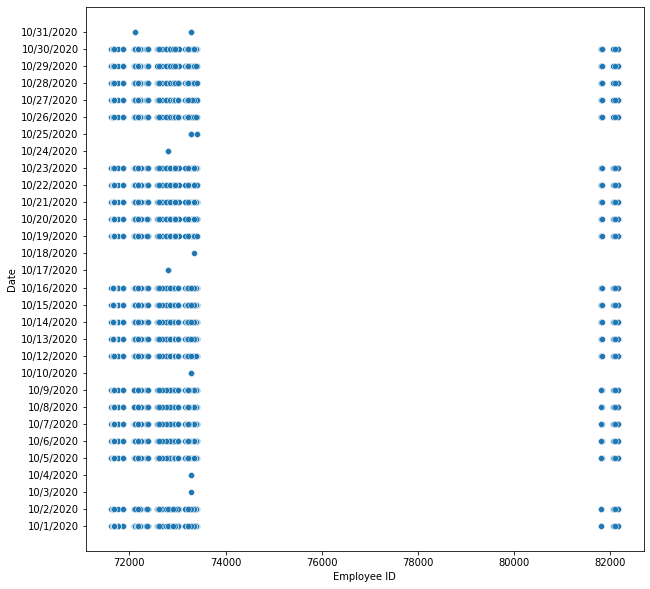

In [11]:
#find the working days in the month
plt.figure(figsize=(10,10))
sns.scatterplot(y='Date', x='Employee ID', data=data_emp)

In [12]:
working_days=30-8;
df_filtered = data_emp[data_emp['Activity'] != 'Leave'] 
df_filtered = df_filtered[df_filtered['Activity'] != 'Holiday'] 
a=df_filtered.groupby('User').Hours.sum()//working_days

In [13]:
a=a.sort_values(ascending=False)
print("Top 5 Employees worked maximum hours")
print(a.head())
print("Top 5 Employees worked minimum hours")
print(a.tail())

Top 5 Employees worked maximum hours
User
User 71663    11.0
User 73399     9.0
User 82164     8.0
User 73311     8.0
User 71656     8.0
Name: Hours, dtype: float64
Top 5 Employees worked minimum hours
User
User 73282    5.0
User 72680    5.0
User 72846    3.0
User 73248    3.0
User 81826    1.0
Name: Hours, dtype: float64


In [14]:
#resources in specific project
print("Enter the project number to look at the resources")
temp=["%.2d" % i for i in range(44)]
res_list=[]
project_var="Project "
for i in range(1,44):
    k=project_var+temp[i]
    proj_filt = data_emp[(data_emp.Project == k)]
    res_list.append(proj_filt.User.nunique(dropna=True))
print(res_list)

Enter the project number to look at the resources
[82, 3, 2, 4, 7, 14, 5, 4, 5, 4, 3, 2, 1, 5, 4, 2, 1, 2, 4, 6, 7, 1, 3, 3, 2, 3, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 4, 4, 2]


In [15]:
temp.pop(0)
data = {'Project_num':temp, 
        'Number':res_list} 
data=pd.DataFrame(data)

<AxesSubplot:xlabel='Number', ylabel='Project_num'>

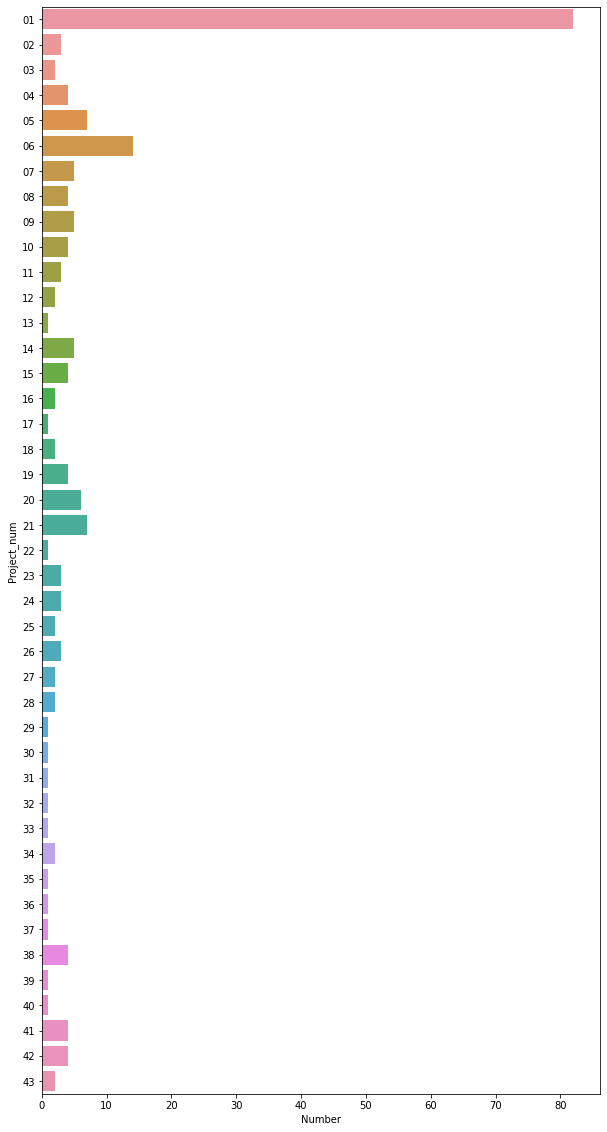

In [16]:
plt.figure(figsize=(10,20))
sns.barplot(x ='Number',y='Project_num', data =data )

In [17]:
#time spent by employees on each project
(data_emp.groupby(['Project','User']).agg({'Hours': ['sum']}))

Hours
                          sum
Project    User              
Project 01 User 71616   32.00
           User 71656  106.66
           User 71663  133.50
           User 71682  149.50
           User 71758   36.00
...                       ...
Project 42 User 72801    3.00
           User 73316    9.00
           User 82164    7.00
Project 43 User 71656    0.70
           User 72906    2.00

[209 rows x 1 columns]

In [18]:
#time spent by employees totally excluding project1
main_p_data_without_leave = m_project_data[m_project_data['Activity'] != 'Leave'] 
main_p_data_without_leave = m_project_data[m_project_data['Activity'] != 'Holiday'] 
temp=(main_p_data_without_leave.groupby(['User']).agg({'Hours': ['sum']}))
pd.set_option("display.max_rows", 10, "display.max_columns", None)
temp.columns=['Hours_sum']
print(temp)

            Hours_sum
User                 
User 71616     144.00
User 71656      96.95
User 71663     116.00
User 71682      26.50
User 71758     140.00
...               ...
User 82088     160.00
User 82156     128.00
User 82159     152.00
User 82163     168.00
User 82164     163.00

[85 rows x 1 columns]


In [19]:
#plt.figure(figsize=(10,10))
#sns.barplot(x='User', y='Hours_sum', data=temp.reset_index())

In [20]:
#time spent by employees totally including project1
p_data_without_leave=df_filtered.groupby(['Employee ID']).agg({'Hours': ['sum']})
p_data_without_leave.columns=['Hours_sum']
p_data_without_leave=p_data_without_leave.sort_values(by="Hours_sum",ascending = False)
print(p_data_without_leave)
#avg time spent by employees totally including project1
avg_temp=(df_filtered.groupby(['User']).agg({'Hours': ['sum']})/22)
avg_temp.columns=['Hours_avg']
avg_temp

             Hours_sum
Employee ID           
71663           249.50
73399           208.50
82164           193.00
72120           191.24
73311           188.00
...                ...
73378           122.00
72680           116.00
73248            84.50
72846            84.00
81826            40.94

[85 rows x 1 columns]


,Hours_avg
User,
User 71616,7.454545
User 71656,8.527727
User 71663,11.340909
User 71682,6.181818
User 71758,6.363636
...,...
User 82088,7.272727
User 82156,7.636364
User 82159,6.909091


In [21]:
#Leave taken by each employee
leave_data=data_emp[data_emp['Activity'] == 'Leave'] 
leave_data=leave_data.groupby('User').agg({'Hours':['sum']})
leave_data=leave_data.sort_values(by=[('Hours', 'sum')],ascending=False)
leave_data

,Hours
,sum
User,
User 73248,88.0
User 72846,84.0
User 73378,48.0
User 82062,40.0
User 72633,32.0
...,...
User 72584,8.0
User 72158,8.0


<AxesSubplot:xlabel="('Hours', 'sum')", ylabel='Activity'>

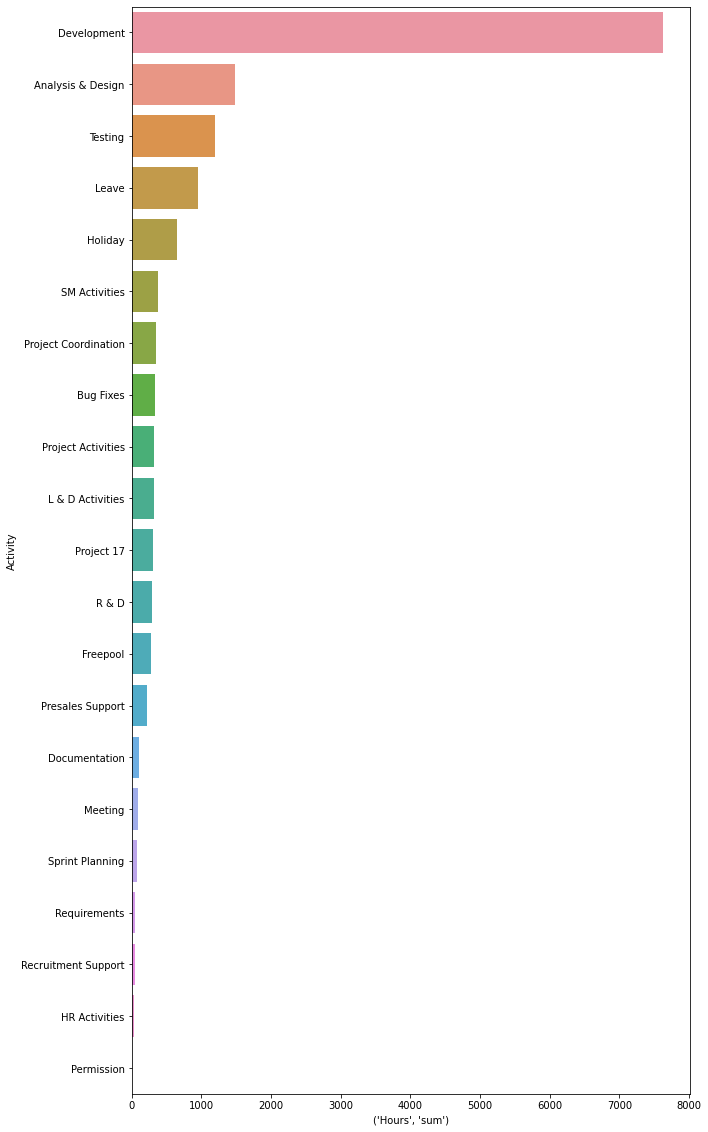

In [22]:
#total time employees spent in each activity
activity_wise_data=data_emp.groupby(['Activity']).agg({'Hours': ['sum']})
activity_wise_data=activity_wise_data.sort_values(by=('Hours', 'sum'),ascending = False)
activity_wise_data
plt.figure(figsize=(10,20))
sns.barplot(y='Activity', x=('Hours', 'sum'), data=activity_wise_data.reset_index())

In [23]:
#List of projects with total of resources in it
resource_in_proj_data=data_emp.groupby('Project')['Employee ID'].nunique()  
resource_in_proj_data

Project
Project 01    82
Project 02     3
Project 03     2
Project 04     4
Project 05     7
              ..
Project 39     1
Project 40     1
Project 41     4
Project 42     4
Project 43     2
Name: Employee ID, Length: 43, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Date'>

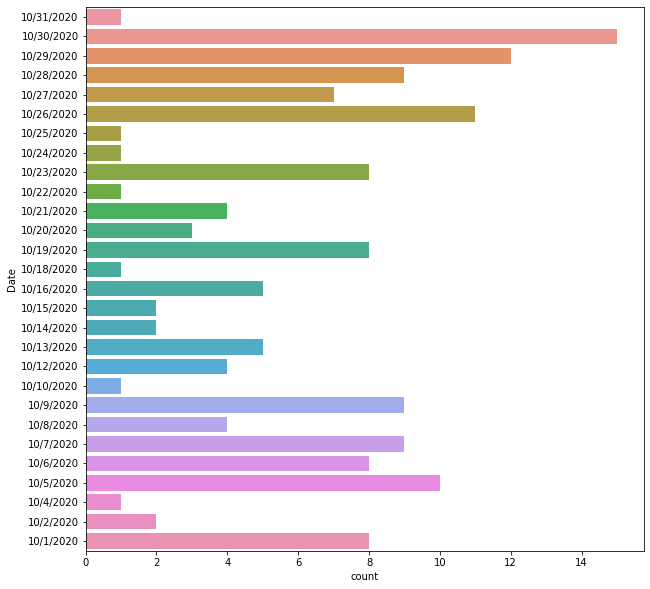

In [24]:
#dates of more leaves taken by employees
leave_data=data_emp[data_emp['Activity'] == 'Leave'] 
plt.figure(figsize=(10,10))
sns.countplot(y='Date', data=leave_data)

In [25]:
#Each user's activity with total time spent in it
pd.set_option("display.max_rows", 10, "display.max_columns", None)
t=data_emp.groupby(['User','Activity']).agg({'Hours': ['sum']})
t

Hours
                               sum
User       Activity               
User 71616 Development         8.0
           Freepool           12.0
           Holiday             8.0
           Leave               4.0
           Presales Support    8.0
...                            ...
User 82163 Holiday             8.0
           L & D Activities  160.0
User 82164 Development       163.0
           Holiday             8.0
           Presales Support   30.0

[326 rows x 1 columns]

In [30]:
#users in specific activity and time spent
t=data_emp.groupby(['Activity','User']).agg({'Hours': ['sum']})
t

Hours
                                 sum
Activity          User              
Analysis & Design User 71656    5.85
                  User 71682    9.00
                  User 71868   11.00
                  User 72179   46.00
                  User 72584   20.00
...                              ...
Testing           User 73244    6.00
                  User 73248   29.00
                  User 73318  160.00
                  User 82084  160.00
                  User 82159   11.00

[326 rows x 1 columns]

In [32]:
time_worked_less_data=(df_filtered.groupby(['User']).agg({'Hours': ['sum']})-22*8)
time_worked_less_data

,Hours
,sum
User,
User 71616,-12.00
User 71656,11.61
User 71663,73.50
User 71682,-40.00
User 71758,-36.00
...,...
User 82088,-16.00
User 82156,-8.00
